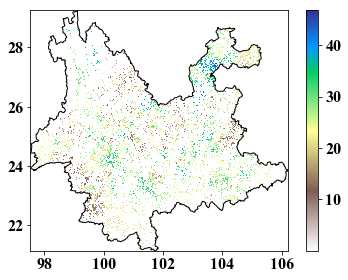

In [70]:
##display tif on map
import os
import rasterio
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', **{'family':'sans-serif', 'sans-serif':['Times New Roman'], 'size':16}) 
#utm18n = ccrs.UTM(18) 墨卡托
ax = plt.axes()
#plt.title('UTM zone 18N')

plt.subplots_adjust(right=0.99, left=0.125, bottom=0.14, top=0.975)##消除白边
here = os.path.dirname(os.path.abspath('__file__'))
data_dir = os.path.join(here, '..', 'data')
raster_file = tif_path#raster path
vector_file = r"F:\soc_stocks\map\yunnan.shp"#vector path


with rasterio.open(raster_file) as src:
    left, bottom, right, top = src.bounds
    b1 = src.read(1)#band1
    b1[b1 < 0] = np.nan#valid data
    img = ax.imshow(b1, origin='upper',
              extent=(left, right, bottom, top), cmap='terrain_r')
    x = [left, right, right, left, left]
    y = [bottom, bottom, top, top, bottom]
    #ax.coastlines(resolution='10m', linewidth=4, color='red')
    #ax.gridlines(linewidth=2, color='lightblue', alpha=0.5, linestyle='--')
    ax.set_xlim(src.bounds.left, src.bounds.right)
    ax.set_ylim(src.bounds.bottom, src.bounds.top)

df = read_file(vector_file)
df.plot(ax=ax,edgecolor='k', facecolor='none', figsize=(15, 10))
#plt.savefig('rasterio_cartopy.tif', dpi=300, bbox_inches='tight')##save fig
plt.colorbar(mappable=img)#colorbar
#plt.show()

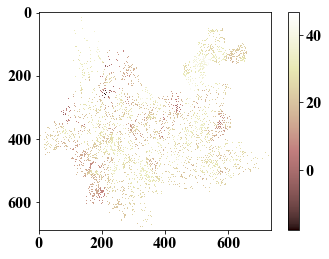

In [47]:
from rasterio.plot import show

import numpy as np

src = rasterio.open(raster_file)
b1 = src.read(1)
b1[b1 <-100] = np.nan
plt.imshow(b1, cmap='pink')
plt.colorbar()

D:\anaconda\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\anaconda\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


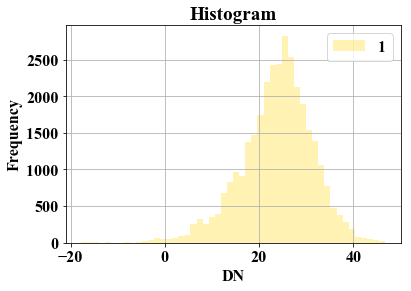

In [49]:
from rasterio.plot import show_hist
show_hist(b1, bins=50, lw=0.0, stacked=False, alpha=0.3,histtype='stepfilled', title="Histogram")

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


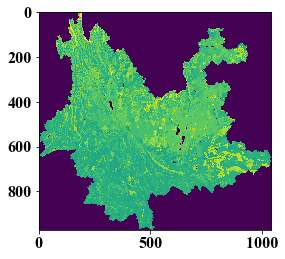

In [69]:
##extract rif by mask
import fiona
import rasterio
import rasterio.mask

# open mask file
with fiona.open(r"F:\soc_stocks\map\yunnan.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]
    

#open tif by masked
with rasterio.open(r"G:\china_geodata\china_soil\PH.tif") as src:
    print(src.read(1))
    out_image, out_transform = rasterio.mask.mask(src, features,
                                                        crop=True)
    out_meta = src.meta.copy()
    plt.imshow(out_image[0,:,:])
    
    
    
    
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 'nodata': 0.,
                 "width": out_image.shape[2],
                 "transform": out_transform})

#write the masked raster to a new file.
with rasterio.open(r"F:\soc_stocks\pH_masked.tif", "w", **out_meta) as dest:
    dest.write(out_image)

In [61]:
src.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 7560,
 'height': 4320,
 'count': 1,
 'crs': CRS({'init': 'epsg:4326'}),
 'transform': Affine(0.008334, 0.0, 73.004166,
        0.0, -0.008334, 53.995834)}

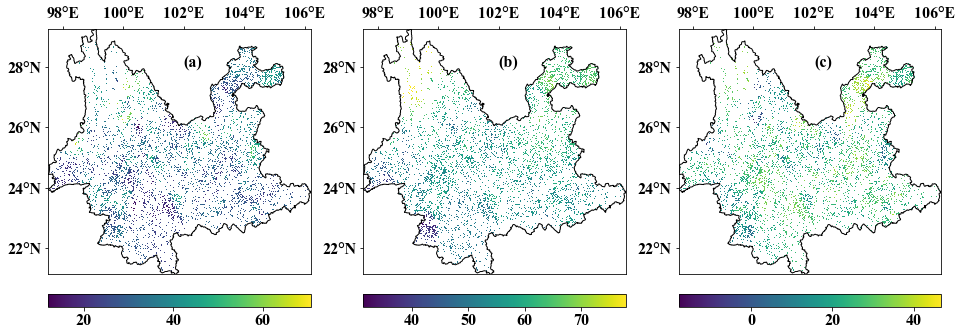

In [94]:
##display multimap
fig, axs = plt.subplots(1, 3,figsize=(16,12) )

path = r'F:\soc_stocks\碳潜力\map'
name = ['stocks_mask', 'c_s_mask', 'c_p_mask']
df = read_file(vector_file)

for i in range(3):
    with rasterio.open(path + os.sep + name[i]+'.tif') as src:
        left, bottom, right, top = src.bounds
        b1 = src.read(1)#band1
        b1[b1 < -100] = np.nan#valid data
        img = axs[i].imshow(b1, origin='upper',
                  extent=(left, right, bottom, top), cmap='viridis')
        x = [left, right, right, left, left]
        y = [bottom, bottom, top, top, bottom]
        axs[i].set_xlim(src.bounds.left, src.bounds.right)
        axs[i].set_ylim(src.bounds.bottom, src.bounds.top)
        fig.colorbar(img,ax=axs[i],orientation='horizontal', pad=0.03,)

        axs[i].text(102, 28, s='(%s)'%'abc'[i])
        axs[i].xaxis.set_ticks_position('top')#设置坐标轴显示位置
        df.plot(ax=axs[i],edgecolor='k', facecolor='none', figsize=(15, 10))
        axs[i].set_xticklabels(('','98°E','100°E', '102°E', '104°E', '106°E'))
        axs[i].set_yticklabels(('','22°N','24°N', '26°N', '28°N'))
        
    

#plt.subplots_adjust(wspace =0.05, )